In [1]:
import numpy as np
import pandas as pd
import pickle
import torch.nn as nn
from torch.utils.data import DataLoader
import json, ast, sys, csv, random
import plotly.express as px
import math
import datetime
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
class BaoTrainingException(Exception):
    pass
csv.field_size_limit(sys.maxsize)
from matplotlib import rcParams

In [2]:
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Verdana']

# OPTIMIZADORES

In [3]:
model_adam = "Model_Adam"
model_agradad = "Model_Adagrad"
model_sgd = "Model_SGD"

In [4]:
def open_files(model):
    model_train_file = open('train_stats_'+model+'.json')
    model_train = ast.literal_eval(model_train_file.read())
    model_val_file = open('val_stats_'+model+'.json')
    model_val = ast.literal_eval(model_val_file.read())
    model_test_file = open('test_stats_'+model+'.json')
    model_test = ast.literal_eval(model_test_file.read())
    model_train_file.close()
    model_val_file.close()
    model_test_file.close()
    return model_train, model_val, model_test

In [5]:
model_adam_train, model_adam_val, model_adam_test =  open_files(model_adam)
model_agradad_train, model_agradad_val, model_adam_test =  open_files(model_agradad)
model_sgd_train, model_sgd_val, model_sgd_test =  open_files(model_sgd)

In [6]:
def tag_points(x):
    """Add quality tags of predictions. Used to plot with plotly"""
    difference = x['time'] - x['y_pred'][0]
    abs_diff = np.abs(difference)
    x['y_pred'] = x['y_pred'][0]
    x['query2'] = x['query'].replace(" . ", ' . <br>').replace(" FILTER", '<br> FILTER').replace(" { ", ' { <br>').replace(" } ", ' <br> }').replace(" ; ", ' ; <br>') 
    p20 = x['time'] * 0.2
    p40 = x['time'] * 0.4
    if abs_diff < p20:
        x['color'] = "good prediction"
    elif abs_diff < p40:
        x['color'] = "aceptable prediction"
    else:
        x['color'] = "bad prediction"
    return x

In [7]:
num_iter = len(model_adam_train['history']['mae_val_by_epoch'])

In [8]:
#num_iter = min([
#    len(model_adam_train['history']['rmse_val_by_epoch']),
#    len(model_agradad_train['history']['rmse_val_by_epoch']),
#    len(model_sgd_train['history']['rmse_val_by_epoch']),    
#])

In [9]:
#model_adam_train['history']['rmse_by_epoch'] = model_adam_train['history']['rmse_by_epoch'][0:num_iter]
#model_agradad_train['history']['rmse_by_epoch'] =model_agradad_train['history']['rmse_by_epoch'][0:num_iter]
#model_sgd_train['history']['rmse_by_epoch'] = model_sgd_train['history']['rmse_by_epoch'][0:num_iter]

#model_adam_train['history']['rmse_val_by_epoch'] = model_adam_train['history']['rmse_val_by_epoch'][0:num_iter]
#model_agradad_train['history']['rmse_val_by_epoch'] =model_agradad_train['history']['rmse_val_by_epoch'][0:num_iter]
#model_sgd_train['history']['rmse_val_by_epoch'] = model_sgd_train['history']['rmse_val_by_epoch'][0:num_iter]

#model_adam_train['history']['mae_by_epoch'] = model_adam_train['history']['mae_by_epoch'][0:num_iter]
#model_agradad_train['history']['mae_by_epoch'] =model_agradad_train['history']['mae_by_epoch'][0:num_iter]
#model_sgd_train['history']['mae_by_epoch'] = model_sgd_train['history']['mae_by_epoch'][0:num_iter]

#model_adam_train['history']['mae_val_by_epoch'] = model_adam_train['history']['mae_val_by_epoch'][0:num_iter]
#model_agradad_train['history']['mae_val_by_epoch'] =model_agradad_train['history']['mae_val_by_epoch'][0:num_iter]
#model_sgd_train['history']['mae_val_by_epoch'] = model_sgd_train['history']['mae_val_by_epoch'][0:num_iter]

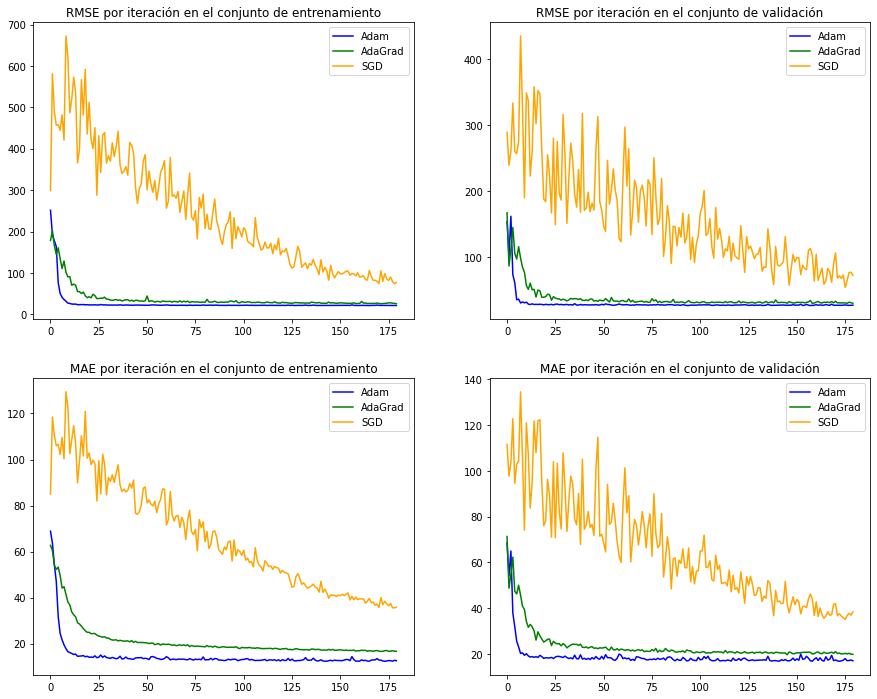

In [72]:
# Some example data to display

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,12))
#fig.suptitle('RMSE por iteración')
c = ['green','blue','yellow','orange','grey','black']
index = np.arange(num_iter)
ax1.set_title('RMSE por iteración en el conjunto de entrenamiento')
ax1.plot(index, model_adam_train['history']['rmse_by_epoch'], color=c[1], label='Adam')
ax1.plot(index, model_agradad_train['history']['rmse_by_epoch'], color=c[0], label='AdaGrad')
ax1.plot(index, model_sgd_train['history']['rmse_by_epoch'], color=c[3], label='SGD')
ax1.legend()

ax2.set_title('RMSE por iteración en el conjunto de validación')
ax2.plot(index, model_adam_train['history']['rmse_val_by_epoch'], color=c[1], label='Adam')
ax2.plot(index, model_agradad_train['history']['rmse_val_by_epoch'], color=c[0], label='AdaGrad')
ax2.plot(index, model_sgd_train['history']['rmse_val_by_epoch'], color=c[3], label='SGD')
ax2.legend()

ax3.set_title('MAE por iteración en el conjunto de entrenamiento')
ax3.plot(index, model_adam_train['history']['mae_by_epoch'], color=c[1], label='Adam')
ax3.plot(index, model_agradad_train['history']['mae_by_epoch'], color=c[0], label='AdaGrad')
ax3.plot(index, model_sgd_train['history']['mae_by_epoch'], color=c[3], label='SGD')
ax3.legend()

ax4.set_title('MAE por iteración en el conjunto de validación')
ax4.plot(index, model_adam_train['history']['mae_val_by_epoch'], color=c[1], label='Adam')
ax4.plot(index, model_agradad_train['history']['mae_val_by_epoch'], color=c[0], label='AdaGrad')
ax4.plot(index, model_sgd_train['history']['mae_val_by_epoch'], color=c[3], label='SGD')
ax4.legend()


# set labels

In [11]:
model_adam_val['pred']

[14.758463859558105,
 1.6255521774291992,
 14.758463859558105,
 14.758463859558105,
 42.48406982421875,
 49.54902267456055,
 36.944313049316406,
 13.64535903930664,
 14.758463859558105,
 28.227203369140625,
 1.5922574996948242,
 10.707067489624023,
 14.758463859558105,
 1.6895112991333008,
 49.392757415771484,
 1.6255521774291992,
 1.5922574996948242,
 14.758463859558105,
 2.1395480632781982,
 14.758463859558105,
 1.6895112991333008,
 62.53260040283203,
 14.758463859558105,
 4.89743709564209,
 1.724024772644043,
 1.5922574996948242,
 1.9915330410003662,
 43.36328887939453,
 3.685208320617676,
 1.5937821865081787,
 14.758463859558105,
 3.3835043907165527,
 1.5937821865081787,
 1.7352204322814941,
 2.3025102615356445,
 1.9224987030029297,
 3.1288342475891113,
 14.758463859558105,
 14.758463859558105,
 2.1534957885742188,
 14.758463859558105,
 2.5300354957580566,
 1.7352204322814941,
 1.6895112991333008,
 49.392757415771484,
 14.758463859558105,
 14.758463859558105,
 46.754459381103516,
 

In [12]:
model_adam_train.keys()

dict_keys(['pred', 'real', 'mse', 'mae', 'rmse', 'history'])

In [13]:
def prediccion_list(model):
    good_p, good_r = [], []
    acceptable_p, acceptable_r = [], []
    bad_p, bad_r = [], []
    for p in range(len(model['pred'])):
        #print(model['pred'][p],model['real'][p])
        difference = model['pred'][p] - model['real'][p]
        abs_diff = np.abs(difference)
        p20 = model['real'][p] * 0.2
        p40 = model['real'][p] * 0.4
        if abs_diff < p20:
            good_r.append(model['real'][p])
            good_p.append(model['pred'][p])
        elif abs_diff < p40:
            acceptable_r.append(model['real'][p])
            acceptable_p.append(model['pred'][p])
        else:
            bad_r.append(model['real'][p])
            bad_p.append(model['pred'][p])
    return good_p, good_r, acceptable_p, acceptable_r, bad_p, bad_r
    

In [14]:
adam_split_train = prediccion_list(model_adam_train)
agradad_split_train = prediccion_list(model_agradad_train)
sgd_split_train = prediccion_list(model_sgd_train)

adam_split_val = prediccion_list(model_adam_val)
agradad_split_val = prediccion_list(model_agradad_val)
sgd_split_val = prediccion_list(model_sgd_val)

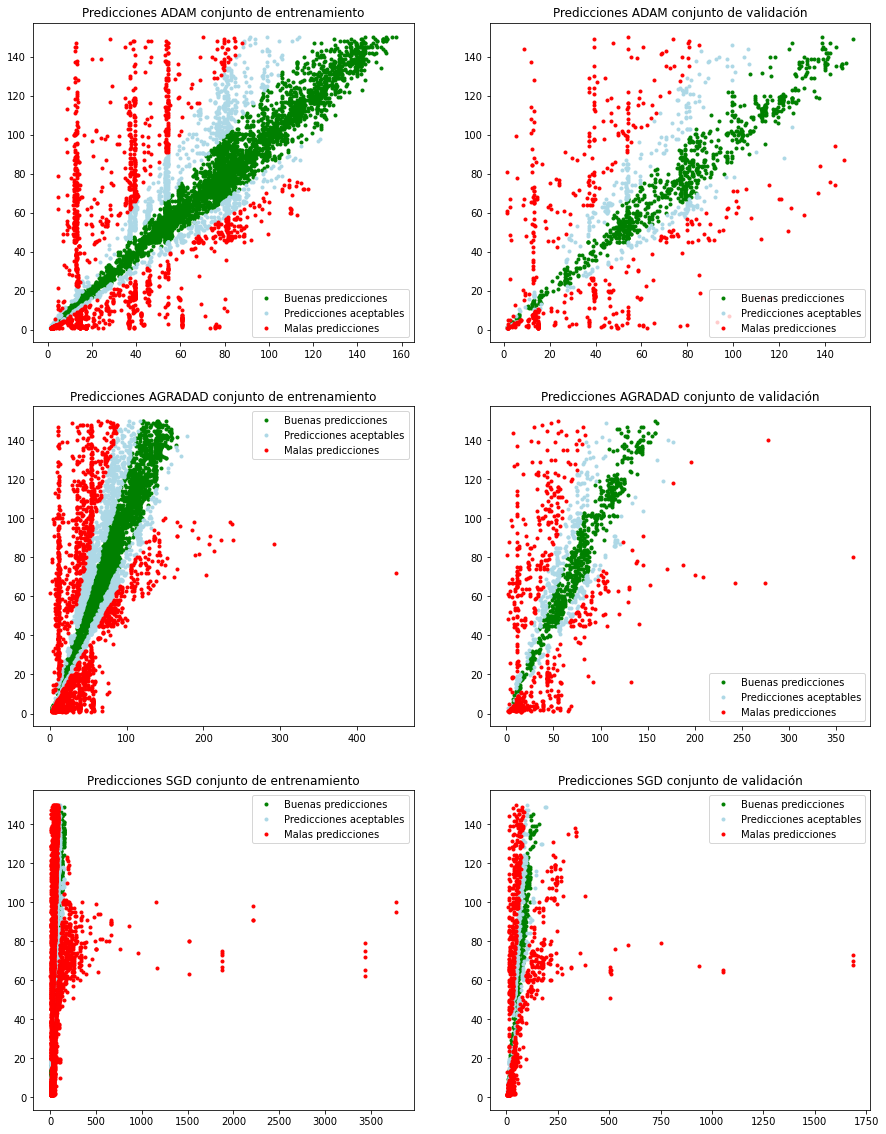

In [15]:
import matplotlib.gridspec as gridspec

fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,20))
#fig.suptitle('RMSE por iteración')
c = ['green','blue','yellow','orange','grey','black']
index = np.arange(num_iter)
ax1.set_title('Predicciones ADAM conjunto de entrenamiento')
ax1.plot(adam_split_train[0],adam_split_train[1], ".", color='green', label = "Buenas predicciones")
ax1.plot(adam_split_train[2],adam_split_train[3], ".", color='lightblue', label ="Predicciones aceptables")
ax1.plot(adam_split_train[4],adam_split_train[5], ".", color='red', label = "Malas predicciones")
ax1.legend()

ax2.set_title('Predicciones ADAM conjunto de validación')
ax2.plot(adam_split_val[0],adam_split_val[1], ".", color='green', label = "Buenas predicciones")
ax2.plot(adam_split_val[2],adam_split_val[3], ".", color='lightblue', label ="Predicciones aceptables")
ax2.plot(adam_split_val[4],adam_split_val[5], ".", color='red', label = "Malas predicciones")
ax2.legend()

ax3.set_title('Predicciones AGRADAD conjunto de entrenamiento')
ax3.plot(agradad_split_train[0],agradad_split_train[1], ".", color='green', label = "Buenas predicciones")
ax3.plot(agradad_split_train[2],agradad_split_train[3], ".", color='lightblue', label ="Predicciones aceptables")
ax3.plot(agradad_split_train[4],agradad_split_train[5], ".", color='red', label = "Malas predicciones")
ax3.legend()

ax4.set_title('Predicciones AGRADAD conjunto de validación')
ax4.plot(agradad_split_val[0],agradad_split_val[1], ".", color='green', label = "Buenas predicciones")
ax4.plot(agradad_split_val[2],agradad_split_val[3], ".", color='lightblue', label ="Predicciones aceptables")
ax4.plot(agradad_split_val[4],agradad_split_val[5], ".", color='red', label = "Malas predicciones")
ax4.legend()

ax5.set_title('Predicciones SGD conjunto de entrenamiento')
ax5.plot(sgd_split_train[0],sgd_split_train[1], ".", color='green', label = "Buenas predicciones")
ax5.plot(sgd_split_train[2],sgd_split_train[3], ".", color='lightblue', label ="Predicciones aceptables")
ax5.plot(sgd_split_train[4],sgd_split_train[5], ".", color='red', label = "Malas predicciones")
ax5.legend()

ax6.set_title('Predicciones SGD conjunto de validación')
ax6.plot(sgd_split_val[0],sgd_split_val[1], ".", color='green', label = "Buenas predicciones")
ax6.plot(sgd_split_val[2],sgd_split_val[3], ".", color='lightblue', label ="Predicciones aceptables")
ax6.plot(sgd_split_val[4],sgd_split_val[5], ".", color='red', label = "Malas predicciones")
ax6.legend()

# set labels

# LEARNING RATES

In [25]:
model_adam_0_0000015 = "Model_Adam_0.0000015"
model_adam_0_000015 = "Model_Adam_0.000015"
model_adam_0_00015 = "Model_Adam"
model_adam_0_0015 = "Model_Adam_0.0015"

In [26]:
model_adam_0_0000015_train, model_adam_0_0000015_val, model_adam_0_0000015_test =  open_files(model_adam_0_0000015)
model_adam_0_000015_train, model_adam_0_000015_val, model_adam_0_000015_test =  open_files(model_adam_0_000015)
model_adam_0_00015_train, model_adam_0_00015_val, model_adam_0_00015_test =  open_files(model_adam)
model_adam_0_0015_train, model_adam_0_0015_val, model_adam_0_0015_test =  open_files(model_adam_0_0015)

In [27]:
num_iter = min([
    len(model_adam_0_0000015_train['history']['rmse_val_by_epoch']),
    len(model_adam_0_000015_train['history']['rmse_val_by_epoch']),
    len(model_adam_0_00015_train['history']['rmse_val_by_epoch']),    
    len(model_adam_0_0015_train['history']['rmse_val_by_epoch']),    
])

In [28]:
#model_adam_0_0000015_train['history']['rmse_by_epoch'] = model_adam_0_0000015_train['history']['rmse_by_epoch'][0:num_iter]
#model_adam_0_000015_train['history']['rmse_by_epoch'] = model_adam_0_000015_train['history']['rmse_by_epoch'][0:num_iter]
#model_adam_0_00015_train['history']['rmse_by_epoch'] = model_adam_0_00015_train['history']['rmse_by_epoch'][0:num_iter]
#model_adam_0_0015_train['history']['rmse_by_epoch'] = model_adam_0_0015_train['history']['rmse_by_epoch'][0:num_iter]


#model_adam_0_0000015_train['history']['rmse_val_by_epoch'] = model_adam_0_0000015_train['history']['rmse_val_by_epoch'][0:num_iter]
#model_adam_0_000015_train['history']['rmse_val_by_epoch'] =model_adam_0_000015_train['history']['rmse_val_by_epoch'][0:num_iter]
#model_adam_0_00015_train['history']['rmse_val_by_epoch'] = model_adam_0_00015_train['history']['rmse_val_by_epoch'][0:num_iter]
#model_adam_0_0015_train['history']['rmse_val_by_epoch'] = model_adam_0_0015_train['history']['rmse_val_by_epoch'][0:num_iter]


#model_adam_0_0000015_train['history']['mae_by_epoch'] = model_adam_0_0000015_train['history']['mae_by_epoch'][0:num_iter]
#model_adam_0_000015_train['history']['mae_by_epoch'] =model_adam_0_000015_train['history']['mae_by_epoch'][0:num_iter]
#model_adam_0_00015_train['history']['mae_by_epoch'] = model_adam_0_00015_train['history']['mae_by_epoch'][0:num_iter]
#model_adam_0_0015_train['history']['mae_by_epoch'] = model_adam_0_0015_train['history']['mae_by_epoch'][0:num_iter]


#model_adam_0_0000015_train['history']['mae_val_by_epoch'] = model_adam_0_0000015_train['history']['mae_val_by_epoch'][0:num_iter]
#model_adam_0_000015_train['history']['mae_val_by_epoch'] =model_adam_0_000015_train['history']['mae_val_by_epoch'][0:num_iter]
#model_adam_0_00015_train['history']['mae_val_by_epoch'] = model_adam_0_00015_train['history']['mae_val_by_epoch'][0:num_iter]
#model_adam_0_0015_train['history']['mae_val_by_epoch'] = model_adam_0_0015_train['history']['mae_val_by_epoch'][0:num_iter]

In [36]:
a = [1,2,3,4,5]
b = [6,7,8,999,9]
c=  [10,11,12,14]

np.max(a+b+c)

999

(0.0, 150.0)

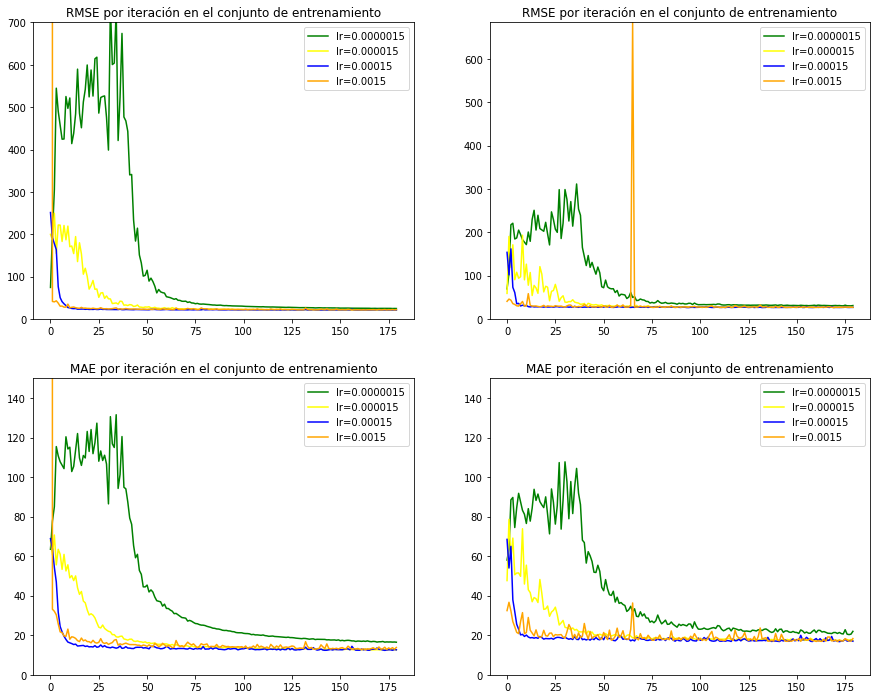

In [51]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,12))
#fig.suptitle('RMSE por iteración')
c = ['green','blue','yellow','orange','grey','black']
index = np.arange(num_iter)
ax1.set_title('RMSE por iteración en el conjunto de entrenamiento')
ax1.plot(index, model_adam_0_0000015_train['history']['rmse_by_epoch'], color=c[0], label='lr=0.0000015')
ax1.plot(index, model_adam_0_000015_train['history']['rmse_by_epoch'], color=c[2], label='lr=0.000015')
ax1.plot(index, model_adam_0_00015_train['history']['rmse_by_epoch'], color=c[1], label='lr=0.00015')
ax1.plot(index, model_adam_0_0015_train['history']['rmse_by_epoch'], color=c[3], label='lr=0.0015')
ax1.legend()

y_lim1 = np.max(model_adam_0_0000015_train['history']['rmse_by_epoch'] + \
               model_adam_0_000015_train['history']['rmse_by_epoch'] + \
               model_adam_0_00015_train['history']['rmse_by_epoch'] + \
               model_adam_0_0015_train['history']['rmse_by_epoch'])

ax1.set_ylim([0, min(y_lim1,700)])


ax2.set_title('RMSE por iteración en el conjunto de entrenamiento')
ax2.plot(index, model_adam_0_0000015_train['history']['rmse_val_by_epoch'], color=c[0], label='lr=0.0000015')
ax2.plot(index, model_adam_0_000015_train['history']['rmse_val_by_epoch'], color=c[2], label='lr=0.000015')
ax2.plot(index, model_adam_0_00015_train['history']['rmse_val_by_epoch'], color=c[1], label='lr=0.00015')
ax2.plot(index, model_adam_0_0015_train['history']['rmse_val_by_epoch'], color=c[3], label='lr=0.0015')
ax2.legend()
y_lim2 = np.max(model_adam_0_0000015_train['history']['rmse_val_by_epoch'] + \
               model_adam_0_000015_train['history']['rmse_val_by_epoch'] + \
               model_adam_0_00015_train['history']['rmse_val_by_epoch'] + \
               model_adam_0_0015_train['history']['rmse_val_by_epoch'])

ax2.set_ylim([0, min(y_lim2,700)])



ax3.set_title('MAE por iteración en el conjunto de entrenamiento')
ax3.plot(index, model_adam_0_0000015_train['history']['mae_by_epoch'], color=c[0], label='lr=0.0000015')
ax3.plot(index, model_adam_0_000015_train['history']['mae_by_epoch'], color=c[2], label='lr=0.000015')
ax3.plot(index, model_adam_0_00015_train['history']['mae_by_epoch'], color=c[1], label='lr=0.00015')
ax3.plot(index, model_adam_0_0015_train['history']['mae_by_epoch'], color=c[3], label='lr=0.0015')
ax3.legend()
y_lim3 = np.max(model_adam_0_0000015_train['history']['mae_by_epoch'] + \
               model_adam_0_000015_train['history']['mae_by_epoch'] + \
               model_adam_0_00015_train['history']['mae_by_epoch'] + \
               model_adam_0_0015_train['history']['mae_by_epoch'])

ax3.set_ylim([0, 150])

ax4.set_title('MAE por iteración en el conjunto de entrenamiento')
ax4.plot(index, model_adam_0_0000015_train['history']['mae_val_by_epoch'], color=c[0], label='lr=0.0000015')
ax4.plot(index, model_adam_0_000015_train['history']['mae_val_by_epoch'], color=c[2], label='lr=0.000015')
ax4.plot(index, model_adam_0_00015_train['history']['mae_val_by_epoch'], color=c[1], label='lr=0.00015')
ax4.plot(index, model_adam_0_0015_train['history']['mae_val_by_epoch'], color=c[3], label='lr=0.0015')
ax4.legend()
y_lim4 = np.max(model_adam_0_0000015_train['history']['mae_val_by_epoch'] + \
               model_adam_0_000015_train['history']['mae_val_by_epoch'] + \
               model_adam_0_00015_train['history']['mae_val_by_epoch'] + \
               model_adam_0_0015_train['history']['mae_val_by_epoch'])

ax4.set_ylim([0, 150])


# set labels

# CAPAS OCULTAS

In [52]:
model_adam_L1 = "Model_Adam_L1"
model_adam_L2 = "Model_Adam_L2"
model_adam_L3 = "Model_Adam_L3"
model_adam_L4 = "Model_Adam_L4"
model_adam_L5 = "Model_Adam"
model_adam_L6 = "Model_Adam_L6"

model_adam_L1_train, model_adam_L1_val, model_adam_L1_test =  open_files(model_adam_L1)
model_adam_L2_train, model_adam_L2_val, model_adam_L2_test =  open_files(model_adam_L2)
model_adam_L3_train, model_adam_L3_val, model_adam_L3_test =  open_files(model_adam_L3)
model_adam_L4_train, model_adam_L4_val, model_adam_L4_test =  open_files(model_adam_L4)
model_adam_L5_train, model_adam_L5_val, model_adam_L5_test =  open_files(model_adam_L5)
model_adam_L6_train, model_adam_L6_val, model_adam_L6_test =  open_files(model_adam_L6)

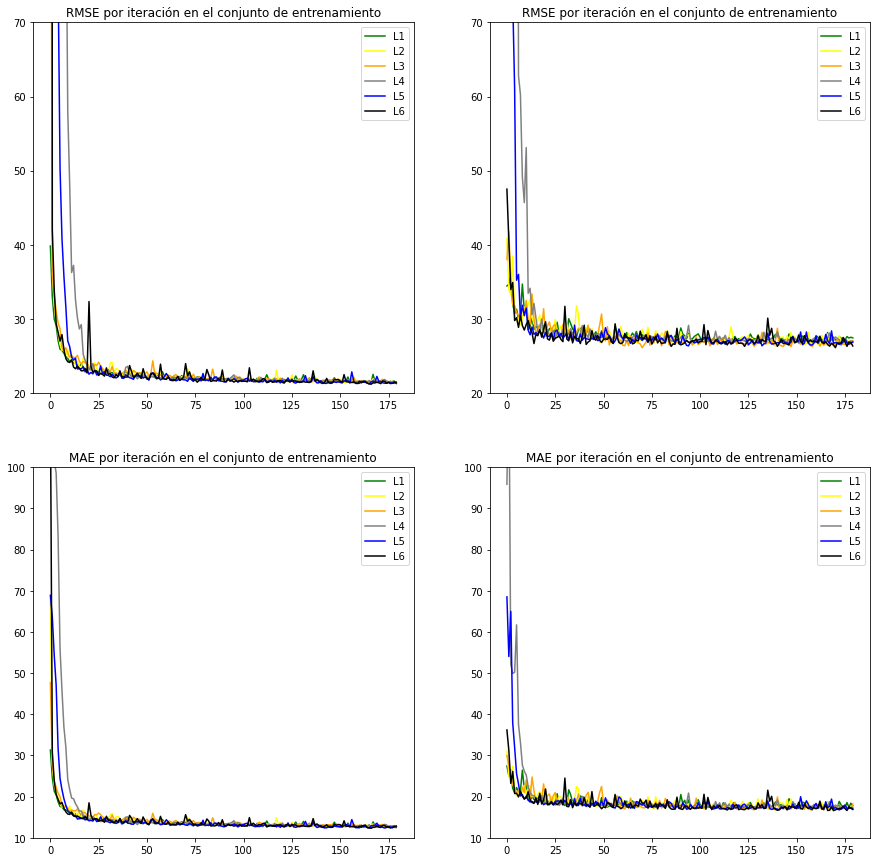

In [71]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
#fig.suptitle('RMSE por iteración')
c = ['green','blue','yellow','orange','grey','black']
index = np.arange(180)
ax1.set_title('RMSE por iteración en el conjunto de entrenamiento')
ax1.plot(index, model_adam_L1_train['history']['rmse_by_epoch'], color=c[0], label='L1')
ax1.plot(index, model_adam_L2_train['history']['rmse_by_epoch'], color=c[2], label='L2')
ax1.plot(index, model_adam_L3_train['history']['rmse_by_epoch'], color=c[3], label='L3')
ax1.plot(index, model_adam_L4_train['history']['rmse_by_epoch'], color=c[4], label='L4')
ax1.plot(index, model_adam_L5_train['history']['rmse_by_epoch'], color=c[1], label='L5')
ax1.plot(index, model_adam_L6_train['history']['rmse_by_epoch'], color=c[5], label='L6')
ax1.set_ylim([20, 70])
ax1.legend()

ax2.set_title('RMSE por iteración en el conjunto de entrenamiento')
ax2.plot(index, model_adam_L1_train['history']['rmse_val_by_epoch'], color=c[0], label='L1')
ax2.plot(index, model_adam_L2_train['history']['rmse_val_by_epoch'], color=c[2], label='L2')
ax2.plot(index, model_adam_L3_train['history']['rmse_val_by_epoch'], color=c[3], label='L3')
ax2.plot(index, model_adam_L4_train['history']['rmse_val_by_epoch'], color=c[4], label='L4')
ax2.plot(index, model_adam_L5_train['history']['rmse_val_by_epoch'], color=c[1], label='L5')
ax2.plot(index, model_adam_L6_train['history']['rmse_val_by_epoch'], color=c[5], label='L6')
ax2.set_ylim([20, 70])
ax2.legend()

ax3.set_title('MAE por iteración en el conjunto de entrenamiento')
ax3.plot(index, model_adam_L1_train['history']['mae_by_epoch'], color=c[0], label='L1')
ax3.plot(index, model_adam_L2_train['history']['mae_by_epoch'], color=c[2], label='L2')
ax3.plot(index, model_adam_L3_train['history']['mae_by_epoch'], color=c[3], label='L3')
ax3.plot(index, model_adam_L4_train['history']['mae_by_epoch'], color=c[4], label='L4')
ax3.plot(index, model_adam_L5_train['history']['mae_by_epoch'], color=c[1], label='L5')
ax3.plot(index, model_adam_L6_train['history']['mae_by_epoch'], color=c[5], label='L6')
ax3.set_ylim([10, 100])
ax3.legend()

ax4.set_title('MAE por iteración en el conjunto de entrenamiento')
ax4.plot(index, model_adam_L1_train['history']['mae_val_by_epoch'], color=c[0], label='L1')
ax4.plot(index, model_adam_L2_train['history']['mae_val_by_epoch'], color=c[2], label='L2')
ax4.plot(index, model_adam_L3_train['history']['mae_val_by_epoch'], color=c[3], label='L3')
ax4.plot(index, model_adam_L4_train['history']['mae_val_by_epoch'], color=c[4], label='L4')
ax4.plot(index, model_adam_L5_train['history']['mae_val_by_epoch'], color=c[1], label='L5')
ax4.plot(index, model_adam_L6_train['history']['mae_val_by_epoch'], color=c[5], label='L6')
ax4.set_ylim([10, 100])
ax4.legend()


# set labels